In [ ]:
    ('WT'   ,'1' ,'WildType')          :FolderWithFlowFiles+'Specimen_061_B7_B07_017.fcs',

    ('6'    ,'1' ,'1xPRMPv10-0P-1')        :FolderWithFlowFiles+'Specimen_007_B1_B01_007.fcs',
    ('6'    ,'1' ,'1xPRMPv10-100P-1')      :FolderWithFlowFiles+'Specimen_009_B3_B03_008.fcs',
    
    ('6'    ,'2' ,'1xPRMPv10-0P-2')        :FolderWithFlowFiles+'Specimen_013_C1_C01_011.fcs',
    ('6'    ,'2' ,'1xPRMPv10-100P-2')      :FolderWithFlowFiles+'Specimen_015_C3_C03_012.fcs',
    
    ('7'    ,'1' ,'PRMPv10-Pos-1')       :FolderWithFlowFiles+'Specimen_019_D1_D01_015.fcs',
    ('7'    ,'2' ,'PRMPv10-Pos-2')       :FolderWithFlowFiles+'Specimen_020_D2_D02_016.fcs',
    ('8'    ,'1' ,'1xPRMPv10-Neg-1')       :FolderWithFlowFiles+'Specimen_001_A1_A01_001.fcs',
    ('8'    ,'2' ,'1xPRMPv10-Neg-2')       :FolderWithFlowFiles+'Specimen_002_A2_A02_002.fcs',
    ('9'    ,'1' ,'PRMPv10-NegL-1')      :FolderWithFlowFiles+'Specimen_003_A3_A03_003.fcs',
    ('9'    ,'2' ,'PRMPv10-NegL-2')      :FolderWithFlowFiles+'Specimen_004_A4_A04_004.fcs',
    
    ('10'    ,'1' ,'2xPRMPv10-0P-1')       :FolderWithFlowFiles+'Specimen_010_B4_B04_009.fcs',
    ('10'    ,'1' ,'2xPRMPv10-100P-1')     :FolderWithFlowFiles+'Specimen_012_B6_B06_010.fcs',
    ('10'    ,'2' ,'2xPRMPv10-0P-2')       :FolderWithFlowFiles+'Specimen_016_C4_C04_013.fcs',
    ('10'    ,'2' ,'2xPRMPv10-100P-2')     :FolderWithFlowFiles+'Specimen_018_C6_C06_014.fcs',
    ('11'    ,'1' ,'2xPRMPv10-Neg-1')      :FolderWithFlowFiles+'Specimen_005_A5_A05_005.fcs',
    ('11'    ,'2' ,'2xPRMPv10-Neg-2')      :FolderWithFlowFiles+'Specimen_006_A6_A06_006.fcs',

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cytoflow as flow
from scipy import stats
#%matplotlib inline

In [5]:
ExperimentIndex = 'Run1_Numxx_'
BlueChannel = 'Pacific Blue-A'#'BV 421-A'
GreenChannel = 'FITC-A'
#RedChannel = 'PE-Texas Red-A'

#FolderWithFlowFiles = 'C:/Users/User/Dropbox (MIT)/MIT 2019 spring/Project/030919_MingPhloretin/FACS/'
#FolderWithFlowFiles = 'Z:/home/chenmzh/incoming/030919_MingPhloretin/FACS/'
FolderWithFlowFiles = 'C:/Users/User/Dropbox (MIT)/MIT 2019 spring/Project/030919_MingPhloretin/FACS/'

BeadName            = FolderWithFlowFiles+"Colors_Beads_037.fcs"
BlankControlName    = FolderWithFlowFiles+"Specimen_061_B7_B07_017.fcs"
MultiControl        = FolderWithFlowFiles+"Specimen_067_A7_A07_018.fcs"
BlueControlName     = FolderWithFlowFiles+"Specimen_068_A8_A08_019.fcs"
YellowControlName   = FolderWithFlowFiles+"Specimen_069_A9_A09_020.fcs"
#RedControlName      = FolderWithFlowFiles+"Specimen_070_A10_A10_021.fcs"

inputs = {
    ('1'    ,'1' ,'Multi')             :FolderWithFlowFiles+'Specimen_067_A7_A07_018.fcs',
    ('2'    ,'1' ,'Blue')              :FolderWithFlowFiles+'Specimen_068_A8_A08_019.fcs',
    ('3'    ,'1' ,'Green')             :FolderWithFlowFiles+'Specimen_069_A9_A09_020.fcs',
    ('4'    ,'1' ,'mKO2')              :FolderWithFlowFiles+'Specimen_070_A10_A10_021.fcs',
    ('4'    ,'1' ,'mKate2')            :FolderWithFlowFiles+'Specimen_071_A11_A11_022.fcs',
    ('4'    ,'1' ,'mCherry')           :FolderWithFlowFiles+'Specimen_072_A12_A12_023.fcs',
    
}

In [6]:
tubes = []

for (abrevKey, repKey, sampleKey), filename in inputs.items(): #Python 3.0
    tube = flow.Tube(file = filename,
                     conditions = {'Abreviation' : abrevKey,
                                   'Rep' : repKey,
                                   'Sample' : sampleKey})
    tubes.append(tube)

import_op = flow.ImportOp(conditions = {'Abreviation' : "category",
                                        'Rep' : "category",
                                        'Sample' : "category"},
                          tubes = tubes)
ex = import_op.apply()

In [7]:
ex.data.columns.values

array(['APC-A', 'APC-Cy7-A', 'Abreviation', 'Alexa Fluor 700-A',
       'AmCyan-A', 'BUV 396-A', 'BUV 737-A', 'FITC-A', 'FSC-A', 'FSC-H',
       'FSC-W', 'PE-A', 'PE-Cy5-A', 'PE-Cy7-A', 'PE-Texas Red-A',
       'Pacific Blue-A', 'PerCP-Cy5-5-A', 'Qdot 605-A', 'Qdot 705-A',
       'Qdot 800-A', 'Rep', 'SSC-A', 'SSC-H', 'SSC-W', 'Sample', 'Time'],
      dtype=object)

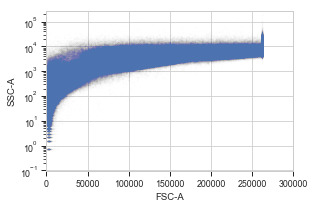

In [8]:
flow.ScatterplotView(xchannel = "FSC-A",
                     ychannel = "SSC-A",
                     yscale = "log").plot(ex, alpha = 0.005)
plt.xlim((0,300000));

C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian_2d.py:209: CytoflowOpWarning: GaussianMixture2DOp is DEPRECATED.  Please use GaussianMixtureOp.
C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian_2d.py:581: CytoflowOpWarning: GaussianMixture1DOp is DEPRECATED.  Please use GaussianMixtureOp.
C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian_2d.py:335: CytoflowOpWarning: GaussianMixture2DOp is DEPRECATED.  Please use GaussianMixtureOp.
C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\utility\log_scale.py:131: RuntimeWarning: overflow encountered in power


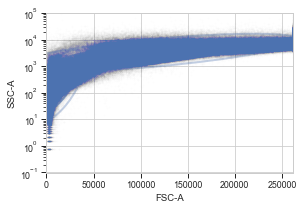

In [9]:
%matplotlib inline
gm_1 = flow.GaussianMixture2DOp(name = "Morpho1",
                                xchannel = "FSC-A",
                                ychannel = "SSC-A",
                                yscale = "log",
                                num_components = 2,
                                sigma = 4)
gm_1.estimate(ex)
gm_1.default_view().plot(ex, alpha = 0.005)
plt.ylim((0.1,100000));
ex_morpho1 = gm_1.apply(ex)
h = plt.gcf()
#h.savefig(ExperimentIndex+'Morpho1.png')

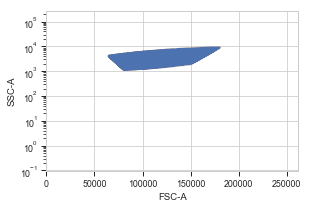

In [10]:
flow.ScatterplotView(xchannel = "FSC-A",
                     ychannel = "SSC-A",
                     yscale = "log",
                     subset = "'Morpho1_2' in Morpho1").plot(ex_morpho1, alpha = 0.005)
h = plt.gcf()
#h.savefig(ExperimentIndex+'Morpho1Check.png')

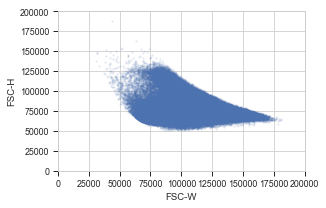

In [11]:
MorphoString = "'Morpho1_2' in Morpho1"
flow.ScatterplotView(xchannel = "FSC-W",
                     ychannel = "FSC-H",
                     subset = MorphoString).plot(ex_morpho1, alpha = 0.1)
plt.ylim((0.1,200000));
plt.xlim((0.1,200000));

C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian_2d.py:209: CytoflowOpWarning: GaussianMixture2DOp is DEPRECATED.  Please use GaussianMixtureOp.
C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian_2d.py:581: CytoflowOpWarning: GaussianMixture1DOp is DEPRECATED.  Please use GaussianMixtureOp.
C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian_2d.py:335: CytoflowOpWarning: GaussianMixture2DOp is DEPRECATED.  Please use GaussianMixtureOp.


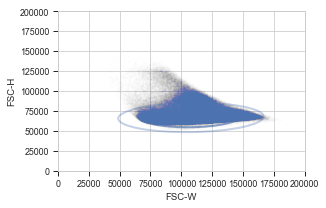

In [12]:
MorphoString = "'Morpho1_2' in Morpho1"
gm_1 = flow.GaussianMixture2DOp(name = "Morpho2",
                                xchannel = "FSC-W",
                                ychannel = "FSC-H",
                                num_components = 1,
                                sigma = 4)
gm_1.estimate(ex_morpho1,subset = MorphoString)
gm_1.default_view(subset = MorphoString).plot(ex_morpho1, alpha = 0.005)
plt.ylim((0.1,200000));
plt.xlim((0.1,200000));
ex_morpho2 = gm_1.apply(ex_morpho1)
h = plt.gcf()
#h.savefig(ExperimentIndex+'Morpho2.png')

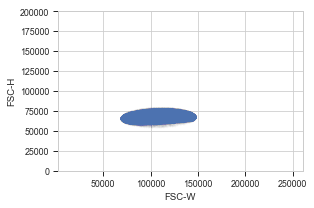

In [13]:
MorphoString = "'Morpho1_2' in Morpho1 and Morpho2 == True"
flow.ScatterplotView(xchannel = "FSC-W",
                     ychannel = "FSC-H",
                     subset = MorphoString).plot(ex_morpho2, alpha = 0.005)
plt.ylim((0.1,200000));
h = plt.gcf()
#h.savefig(ExperimentIndex+'Morpho2Check.png')

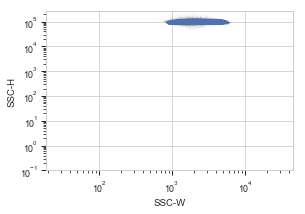

In [14]:
flow.ScatterplotView(xchannel = "SSC-W",
                     ychannel = "SSC-H",
                     xscale = "log",
                     yscale = "log",
                     subset = MorphoString).plot(ex_morpho2, alpha = 0.005)
h = plt.gcf()
#h.savefig(ExperimentIndex+'EndMorphoCheck.png')

In [15]:
ex_morpho2.data.columns.values

array(['APC-A', 'APC-Cy7-A', 'Abreviation', 'Alexa Fluor 700-A',
       'AmCyan-A', 'BUV 396-A', 'BUV 737-A', 'FITC-A', 'FSC-A', 'FSC-H',
       'FSC-W', 'PE-A', 'PE-Cy5-A', 'PE-Cy7-A', 'PE-Texas Red-A',
       'Pacific Blue-A', 'PerCP-Cy5-5-A', 'Qdot 605-A', 'Qdot 705-A',
       'Qdot 800-A', 'Rep', 'SSC-A', 'SSC-H', 'SSC-W', 'Sample', 'Time',
       'Morpho1', 'Morpho2'], dtype=object)

In [16]:
ex_morpho2.data

,APC-A,APC-Cy7-A,Abreviation,Alexa Fluor 700-A,AmCyan-A,BUV 396-A,BUV 737-A,FITC-A,FSC-A,FSC-H,...,Qdot 705-A,Qdot 800-A,Rep,SSC-A,SSC-H,SSC-W,Sample,Time,Morpho1,Morpho2
0,240.000000,-4.480000,1,35.840000,262143.000000,99.190002,1720.810059,49472.25,198982.078125,94918.625000,...,11254.850586,53557.652344,1,7087.50,148969.343750,3118.0,Multi,53.400002,Morpho1_None,False
1,138.239990,4.480000,1,17.920000,15853.350586,108.290001,961.870056,161.25,129739.679688,69345.179688,...,410.550018,2495.600098,1,3673.50,94004.882812,2561.0,Multi,53.400002,Morpho1_2,True
2,14.080000,-7.040000,1,-3.200000,-5604.050293,-14.560000,604.239990,176.25,24390.240234,56497.906250,...,-279.649994,1479.850098,1,627.00,82182.148438,500.0,Multi,53.400002,Morpho1_1,False
3,154.239990,-3.200000,1,-7.680000,262143.000000,74.620003,334.880005,4512.75,95312.156250,68445.953125,...,1307.300049,3862.400146,1,3819.00,111932.914062,2236.0,Multi,53.500000,Morpho1_2,True
4,122.239998,46.079998,1,7.680000,262143.000000,54.600002,848.119995,59683.50,113698.554688,64666.687500,...,9076.299805,42568.000000,1,3889.50,98991.179688,2575.0,Multi,53.500000,Morpho1_2,True
5,-24.320000,-13.440000,1,5.120000,-7347.400391,22.750000,137.410004,30.75,39842.878906,58262.335938,...,0.000000,777.750000,1,668.25,88117.570312,497.0,Multi,53.500000,Morpho1_None,False
6,164.479996,2.560000,1,11.520000,2849.200195,84.630005,1961.960083,74.25,123555.359375,67079.132812,...,657.900024,3556.400146,1,3673.50,104809.101562,2297.0,Multi,53.500000,Morpho1_2,True
7,183.679993,-15.360000,1,30.080000,35726.351562,31.850000,714.350037,273.00,84559.679688,63077.117188,...,564.400024,2663.050049,1,2236.50,107535.773438,1363.0,Multi,53.500000,Morpho1_2,True
8,244.479996,7.040000,1,11.520000,262143.000000,77.349998,1170.260010,65493.00,100553.757812,63767.179688,...,7989.150391,27471.150391,1,4495.50,91723.875000,3212.0,Multi,53.599998,Morpho1_2,True
9,49.279999,-26.240000,1,-11.520000,156659.250000,13.650001,285.740021,2170.50,97071.359375,60112.148438,...,615.400024,4585.750000,1,2783.25,93348.554688,1954.0,Multi,53.599998,Morpho1_2,True


C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian_2d.py:335: CytoflowOpWarning: GaussianMixture2DOp is DEPRECATED.  Please use GaussianMixtureOp.
C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\utility\log_scale.py:131: RuntimeWarning: overflow encountered in power
C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian_2d.py:335: CytoflowOpWarning: GaussianMixture2DOp is DEPRECATED.  Please use GaussianMixtureOp.


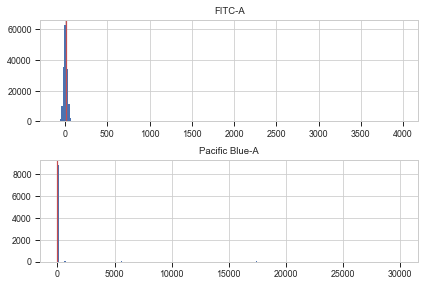

In [17]:
af_op = flow.AutofluorescenceOp()
af_op.blank_file = BlankControlName
af_op.channels = [GreenChannel,BlueChannel]
af_op.estimate(ex_morpho2, subset = MorphoString)
af_op.default_view().plot(ex_morpho2)
plt.rcParams["figure.figsize"] = [10,10]
ex_af = af_op.apply(ex_morpho2)

#h = plt.gcf()
#h.savefig(ExperimentIndex+'AF.png', transparent=True, bbox_inches='tight')
#ex_af = ex_morpho2

C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian_2d.py:335: CytoflowOpWarning: GaussianMixture2DOp is DEPRECATED.  Please use GaussianMixtureOp.
C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\utility\log_scale.py:131: RuntimeWarning: overflow encountered in power
C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian_2d.py:335: CytoflowOpWarning: GaussianMixture2DOp is DEPRECATED.  Please use GaussianMixtureOp.
C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian_2d.py:335: CytoflowOpWarning: GaussianMixture2DOp is DEPRECATED.  Please use GaussianMixtureOp.
C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\utility\log_scale.py:131: RuntimeWarning: overflow encountered in power
C:\Users\User\Anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian_2d.py:335: CytoflowOpWarning: GaussianMixture2DOp is DEPRECATED.  Please use GaussianMixtureOp.


IndexError: list index out of range

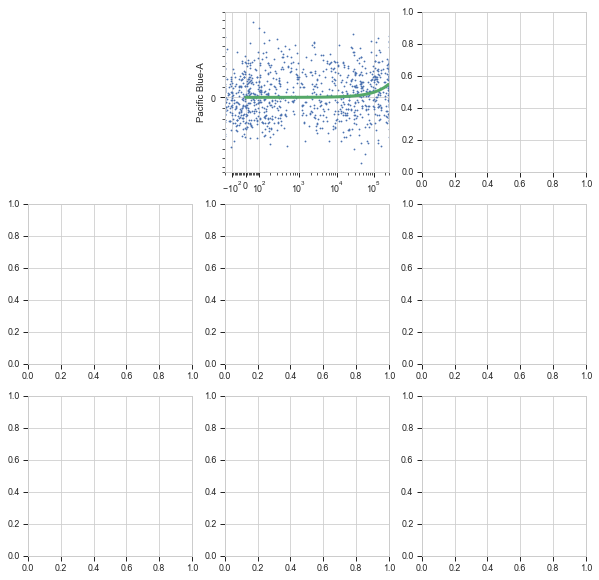

In [18]:
bl_op = flow.BleedthroughLinearOp()
bl_op.controls = {GreenChannel   : YellowControlName,
                  BlueChannel    : BlueControlName}
bl_op.estimate(ex_af, subset = MorphoString)
bl_op.default_view().plot(ex_af)

%time ex_bl = bl_op.apply(ex_af)

#h = plt.gcf()
#h.savefig(ExperimentIndex+'Bleed.png')
#ex_bl = ex_af

In [ ]:
#bead_op = flow.BeadCalibrationOp()
#bead_op.beads = flow.BeadCalibrationOp.BEADS["Spherotech RCP-30-5A Lot AG01, AF02, AD04 and AAE01"] #we used AF01 need to update
#bead_op.units = {BlueChannel : "MEFL",
#                 GreenChannel : "MEFL"}
#
#bead_op.bead_brightness_threshold = 80
#bead_op.beads_file = BeadName
#bead_op.estimate(ex_bl)
#
#bead_op.default_view().plot(ex_bl)
#h = plt.gcf()
#h.set_size_inches(8,40)
#ex_beads = bead_op.apply(ex_bl)
ex_beads = ex_bl

#h = plt.gcf()
#h.savefig(ExperimentIndex+'Beads.png')    

In [ ]:
## NOTE sample so sparce had to remove Morpho Gate...
#ct_op = flow.ColorTranslationOp()
#ct_op.translation = {BlueChannel : GreenChannel}
#ct_op.controls = {(BlueChannel, GreenChannel) : MultiControl}
#ct_op.mixture_model = True
#
#ct_op.estimate(ex_beads,subset = MorphoString)
#ct_op.default_view().plot(ex_beads)
#ex_calib = ct_op.apply(ex_beads)
ex_calib = ex_beads

#h = plt.gcf()
#h.savefig(ExperimentIndex+'Color.png', transparent=True, bbox_inches='tight')

In [ ]:
bin_op = flow.BinningOp(name = "Transfection_Bin",
                        channel = BlueChannel,
                        bin_width = 0.5,
                        scale = "log",
                        bin_count_name = "Transfection_Bin_Count") 

ex_bin = bin_op.apply(ex_calib)
flow.HistogramView(channel =  BlueChannel,
                   huefacet = "Transfection_Bin",
                   scale = "log").plot(ex_bin)

In [ ]:
#DatatoLookAt= "Transfected == True and Transfection_Bin_Count > 500"
DatatoLookAt = MorphoString+" and ('8' in Abreviation or '9' in Abreviation or '11' in Abreviation)"
ex_stats = flow.ChannelStatisticOp(name = "Output",
                                   channel = GreenChannel,
                                   by = ["Sample","Transfection_Bin"],
                                   function = flow.geom_mean,
                                   subset = DatatoLookAt).apply(ex_bin)

ex_stats = flow.ChannelStatisticOp(name = "Output",
                                  channel = GreenChannel,
                                  by = ["Sample","Transfection_Bin"],
                                  function = lambda x: np.std(x) / np.sqrt(len(x)),
                                  statistic_name = "Replicate SEM",
                                  subset = DatatoLookAt).apply(ex_stats)

In [ ]:
np.unique(ex_stats.data['Abreviation'])

In [ ]:
test = flow.Stats1DView(statistic = ("Output", "geom_mean"),
                 variable = "Transfection_Bin",
                 huefacet = "Sample",
                 xscale = "log",
                 #yscale = "log",
                 error_statistic = ("Output","Replicate SEM")).plot(ex_stats)
plt.xlim((1,100000));
plt.ylim((1,100000));
plt.yscale('log')
h = plt.gcf()
h.savefig('output vs geom_mean')

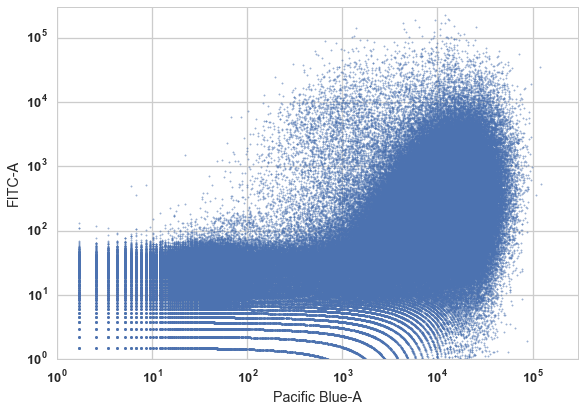

In [59]:
DataToLookAt = MorphoString + " and '10' in Abreviation"

flow.ScatterplotView(xchannel = BlueChannel,
                     ychannel = GreenChannel,
                     #yscale = "log",
                     subset = DataToLookAt).plot(ex_calib, alpha = 0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlim((1,300000));  
plt.ylim((1,300000));  

In [60]:
plt.figure(figsize=(10,10))
gMeanStatsData = ex_stats.statistics[("Output", 'geom_mean')]
gErrStatsData = ex_stats.statistics[("Output", 'Replicate SEM')]

In [61]:
gMeanStatsData

Sample            Transfection_Bin
PRMPv10-NegL-1    0.1000                 -2.677808
                  0.3162                 -1.426647
                  1.0000                  0.489364
                  3.1620                  0.309261
                  10.0000                 1.183560
                  31.6200                 2.322099
                  100.0000                2.765355
                  316.2000                3.790074
                  1000.0000               7.382095
                  3162.0000              16.050397
                  10000.0000             51.946645
                  31620.0000            240.048877
                  100000.0000           779.407426
2xPRMPv10-100P-1  0.1000                 -2.928573
                  0.3162                  2.017802
                  1.0000                  1.900039
                  3.1620                  2.912842
                  10.0000                 5.279028
                  31.6200                 8.787

Plus Minus Ph Fold Change 7.39446604814
Pos Minus Ph Fold Change 9.75280734606


c:\users\kathe\anaconda3\envs\mcf_dev\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans


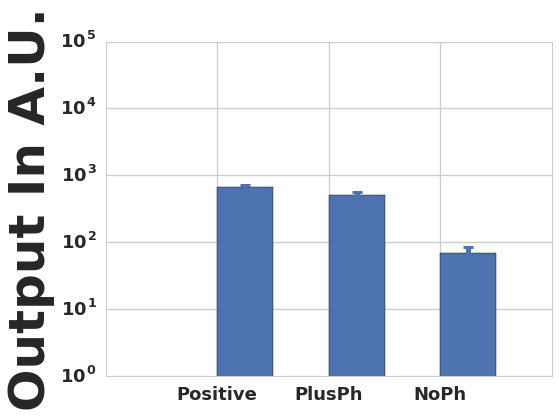

In [55]:
PosName = 'PRMPv10-Pos-1'
PlusName = '1xPRMPv10-100P-1'
MinusName = '1xPRMPv10-0P-1'

plt.figure(figsize=(8,6))
BinValue = 3162.0000 
gMeanStatsData = ex_stats.statistics[("Output", 'geom_mean')]
gErrStatsData = ex_stats.statistics[("Output", 'Replicate SEM')]
means = [gMeanStatsData[PosName][BinValue],
         gMeanStatsData[PlusName][BinValue],
         gMeanStatsData[MinusName][BinValue]]
errs  = [gErrStatsData[PosName][BinValue],
         gErrStatsData[PlusName][BinValue],
         gErrStatsData[MinusName][BinValue]]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 1}

plt.rc('font', **font)
bar_width = 0.5
plt.bar(np.arange(3)+1, means, 
                 bar_width,
                 log = True,
                 yerr=errs,
                 tick_label = ['Positive','PlusPh','NoPh'],
                 error_kw=dict(lw=5, capsize=5, capthick=3))
plt.tick_params(labelsize=18)
plt.ylim([1,100000])
plt.xlim([0,4])
plt.ylabel('Output In A.U.',fontsize=50,fontweight='bold')
print('Plus Minus Ph Fold Change',gMeanStatsData[PlusName][BinValue]/gMeanStatsData[MinusName][BinValue])
print('Pos Minus Ph Fold Change',gMeanStatsData[PosName][BinValue]/gMeanStatsData[MinusName][BinValue])